# Loading Standard libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the data set

In [2]:
url='F:\Edyoda_notes\data-science-complete-tutorial-master\Data\house_rental_data.csv.txt'
df=pd.read_csv(url)
df=df.drop('Unnamed: 0',axis=1)
df.head(10)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
5,1127.886,11,12,4,2,2,148000
6,1352.040,5,7,3,2,1,58000
7,757.854,5,14,1,0,1,48000
8,1152.792,10,12,3,2,2,45000
9,1423.200,4,5,4,2,2,65000


# Data Preprocessing

In [3]:
df.shape

(645, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [5]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [6]:
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss

StandardScaler()

In [8]:
df[['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom']] = ss.fit_transform(df[['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom']])
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,-0.456393,-1.014897,-0.772347,-0.828956,0.402694,0.276918,62000
1,0.791798,-0.242042,-0.772347,1.151328,0.402694,0.276918,78000
2,-0.507434,-0.242042,-0.772347,-0.828956,0.402694,-1.187117,58000
3,-0.089824,-1.014897,-0.772347,0.161186,0.402694,0.276918,45000
4,-0.730160,1.303669,0.629803,0.161186,0.402694,0.276918,45000


<AxesSubplot:xlabel='Sqft', ylabel='Price'>

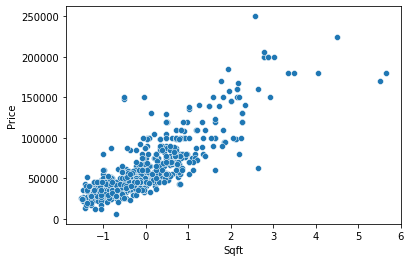

In [9]:
sns.scatterplot(x=df['Sqft'],y=df['Price'])

<AxesSubplot:>

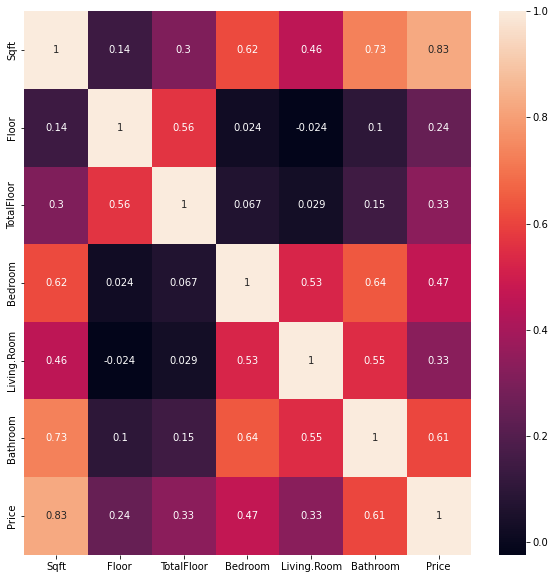

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [11]:
## As sqft area increases price of the house also increases.

# Seperating X and y

In [12]:
#X = df.drop('Price', axis = 1)
X=df[['Sqft','Bedroom','Bathroom']]

y = df['Price']


# Divide the data into train set and test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fit the KNN Classifier on X_train and y_train

In [14]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn

KNeighborsRegressor()

In [15]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

# Perform prediction on the entire X_test data

In [16]:
y_pred=knn.predict(X_test)

In [17]:
y_pred

array([ 65177.6,  41400. ,  42599.8,  42360. ,  77000. ,  66000. ,
        87600. ,  77999.8,  82200. ,  33799.8,  51177.6,  39377.6,
        55599.6,  33600. ,  23277.6,  82200. ,  59624. ,  28120. ,
        46200. ,  30200. ,  36400. ,  50777.6,  42000. , 163000. ,
       182000. ,  43400. ,  58400. ,  39406.4,  32900. ,  37000. ,
        45320. ,  49400. ,  79000. ,  36800. ,  39377.6,  72000. ,
        73000. ,  63000. ,  81499.8,  82800. ,  58400. , 149800. ,
        93600. ,  43400. ,  41599.8,  48960. ,  40199.8,  23920. ,
        64880. ,  26720. ,  44800. ,  82200. , 195000. ,  52800. ,
        63000. ,  82200. ,  96000. ,  35960. ,  64199.6,  67000. ,
        84560. , 141000. ,  82800. ,  73599.8,  69800. ,  36000. ,
        33599.8,  38606.4,  23277.6,  42599.8,  26100. ,  33599.8,
        36000. ,  23277.6,  66000. ,  23920. ,  77999.6,  46400. ,
        38000. ,  42800. ,  66499.8,  72999.6,  55599.6,  23920. ,
        41599.8,  31200. , 138600. , 132332.8,  36400. ,  3780

# Checking for accuracy

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7097106981442928